<a href="https://colab.research.google.com/github/kmanisgithub/Netflix-Movies-and-TV-Shows/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Movies and TV Shows

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

# Introduction

#### Exploratory Data Analysis using Python

Netflix is a popular service that people across the world use for entertainment. In this EDA, I will explore the netflix-shows dataset through visualizations and graphs using matplotlib and seaborn.
I got this dataset from:-https://www.kaggle.com/datasets/shivamb/netflix-shows.


Let's learn Exploratory Data Analysis with Python by analyzing the Netflix Movies and TV Shows and Explore the Netflix-shows dataset through visualizations and graphs using matplotlib and seaborn. Learn how to handle null values in the data and split it into separate datasets for movies and TV shows. Follow along with the Python code for data preparation and cleaning.

# A Short History of Netflix

Netflix is a popular streaming service that provides a wide variety of movies, TV shows, documentaries, and original content to its subscribers. It was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. Originally, Netflix started as a DVD-by-mail service, allowing customers to rent DVDs and have them delivered to their homes.

In 2007, Netflix introduced its streaming service, allowing subscribers to watch movies and TV shows instantly on their computers. This marked a significant shift in the company's business model and laid the foundation for its future success. Over time, Netflix expanded its streaming service to various platforms, including smart TVs, gaming consoles, smartphones, and tablets.


# Downloading the Dataset
In this Project, we'll analyze the Netflix Movies and TV Shows dataset. You can find the raw data & official analysis here: https://www.kaggle.com/datasets/shivamb/netflix-shows.

There are several options for getting the dataset into Jupyter:

1. Download the CSV manually and upload it via Jupyter's GUI
2. Use the urlretrieve function from the urllib.request to download CSV files from a raw URL
3. Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.

We'll use the manually and upload option to upload files and the dataset into Jupyter.

In [1]:
!pip install opendatasets --upgrade --quiet

### Package Install and Import
First, we will install and import necessary packages.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Downloading the dataset


dataset_url = 'https://www.kaggle.com/datasets/shivamb/netflix-shows'

In [6]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: megie9165
Your Kaggle Key: ··········


100%|██████████| 1.34M/1.34M [00:00<00:00, 127MB/s]

The dataset has been downloaded and extracted.

### Loading the Dataset
Now we are ready to load the dataset. We will do this using the standard read_csv command from Pandas.
It seems like the dataset contains only one file:

- `netflix_titles.csv` - The list of type of movie, title, director, casts,country etc.

Let's load the CSV files using the Pandas library. We'll use the name `netflix_titles_df` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [7]:
netflix_titles_df = pd.read_csv('netflix-shows/netflix_titles.csv')

In [8]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


After a quick glimpse at the dataset, it looks like a typical movies/shows dataset without user ratings. We can also see that there are NaN values in some columns.

In [9]:
project_name = "netflix-movies-and-tv-shows"

# Data Preparation and Cleaning

Data preparation and cleaning are crucial steps in the exploratory data analysis (EDA) process. They involve transforming raw data into a format that is suitable for analysis and removing any inconsistencies, errors, or missing values. Here are some common steps involved in data preparation and cleaning during EDA:
1. Handling Missing Data
2. Removing Duplicates
3. Dealing with Outliers
4. Handling Categorical Variables
5. Reshaping Data
6. Handling Data Integrity Issues
7. Feature Engineering


In [10]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
netflix_titles_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

### Handling Null Values
We can see that for each of the columns, there are alot different unique values for some of them. It makes sense that show_id is large since it is a unique key used to identify a movie/show. Title, director, cast, country, date_added, listed_in, and description contain many unique values as well.

In [12]:
netflix_titles_df.isnull().values.any()

True

In [13]:
netflix_titles_df.isnull().sum().sum()

4307

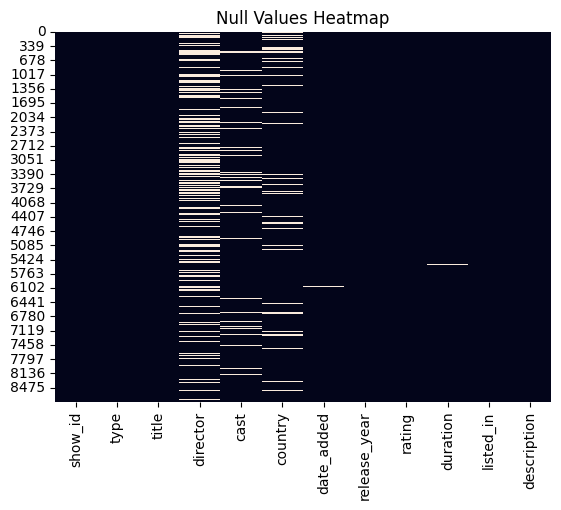

In [14]:
sns.heatmap(netflix_titles_df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [15]:
netflix_titles_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Above in the heatmap and table, we can see that there are quite a few null values in the dataset. There are a total of 4,307 null values across the entire dataset with 2,634 missing points under 'director', 825 under 'cast', 831 under 'country', 10 under 'date_added', 4 under 'rating' and 3 under duration. We will have to handle all null data points before we can dive into EDA and modeling.

In [16]:
netflix_titles_df['director'].fillna('No Director', inplace=True)
netflix_titles_df['cast'].fillna('No Cast', inplace=True)
netflix_titles_df['country'].fillna('Country Unavailable', inplace=True)
netflix_titles_df.dropna(subset=['date_added','rating'],inplace=True)

In [17]:
netflix_titles_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration         True
listed_in       False
description     False
dtype: bool

For null values, the easiest way to get rid of them would be to delete the rows with the missing data. However, this wouldn't be beneficial to our EDA since there is loss of information. Since 'director', 'cast', and 'country' contain the majority of null values, I will choose to treat each missing value as unavailable. The other two labels 'date_added' and 'rating' contains an insignificant portion of the data so I will drop them from the dataset. After, we can see that there are no more null values in the dataset.

### Splitting the Dataset
Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows.

In [18]:
netflix_movies_df = netflix_titles_df[netflix_titles_df['type']=='Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [19]:
netflix_shows_df = netflix_titles_df[netflix_titles_df['type']=='TV Show'].copy()
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


## Exploratory Analysis and Visualization

- `Data visualization` is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers. Visualizing data is an essential part of data analysis and machine learning. We'll use Python libraries Matplotlib and Seaborn to learn and apply some popular data visualization techniques. We'll use the words chart, plot, and graph interchangeably in this project.

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

To begin, let's install and import the libraries. We'll use the matplotlib.pyplot module for basic plots like line & bar charts. It is often imported with the alias plt. We'll use the seaborn module for more advanced plots. It is commonly imported with the alias sns.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

First we will begin analysis on the entire Netflix dataset consisting of both movies and shows. Revisiting the data, let us see how it looked like again.

In [21]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Let's compare types, which is dominating on Netflix  : Movie or TV Show
It'd be interesting to see the comparison between the total number of movies and shows in this dataset just to get an idea of which one is the majority.

In [27]:
# plt.figure(figsize=(7,5))
# g = sns.countplot(netflix_titles_df.type, palette="pastel");
# plt.title("Count of Movies and TV Shows")
# plt.xlabel("Type (Movie/TV Show)")
# plt.ylabel("Total Count")
# plt.show()

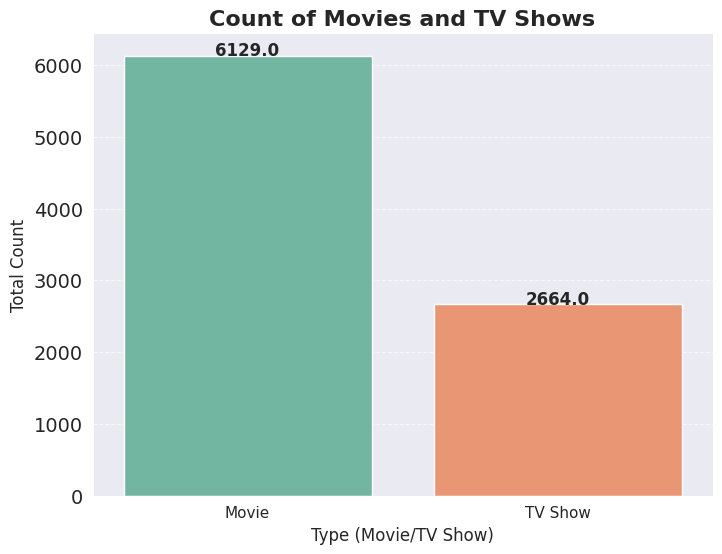

In [26]:
# Set a custom color palette
custom_palette = sns.color_palette("Set2")

# Create a figure and axis
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="type", data=netflix_titles_df, palette=custom_palette)

# Add a title and labels with custom fonts and sizes
ax.set_title("Count of Movies and TV Shows", fontsize=16, fontweight='bold')
ax.set_xlabel("Type (Movie/TV Show)", fontsize=12)
ax.set_ylabel("Total Count", fontsize=12)

# Customize the tick labels
ax.set_xticklabels(["Movie", "TV Show"], fontsize=11)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations with the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, fontweight='bold')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


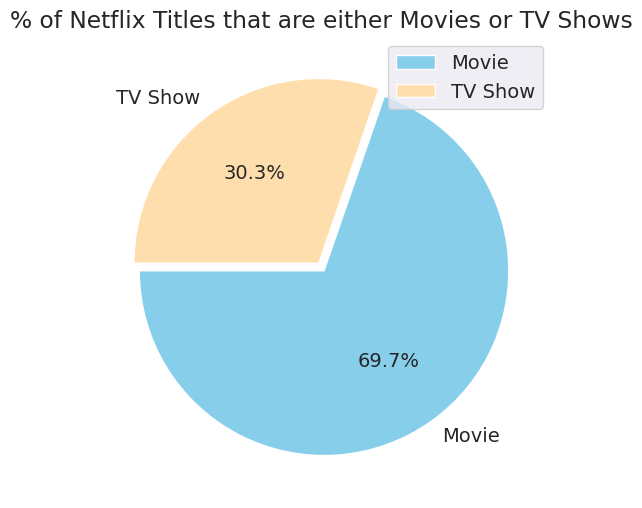

In [24]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_titles_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_titles_df.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

So there are roughly 4,000+ movies and almost 2,000 shows with movies being the majority. This makes sense since shows are always an ongoing thing and have episodes. If we were to do a headcount of TV show episodes vs. movies, I am sure that TV shows would come out as the majority. However, in terms of title, there are far more movie titles (68.5%) than TV show titles (31.5%).

### Netflix Film Ratings
Now, we will explore the ratings which are based on the film rating system. The ordering of the ratings will be based on the age of the respective audience from youngest to oldest. We will not include the ratings 'NR' and 'UR' in the visuals since they stand for unrated and non-rated content.

In [28]:
# order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
# plt.figure(figsize=(15,7))
# g = sns.countplot(netflix_titles_df.rating, hue=netflix_titles_df.type, order=order, palette="pastel");
# plt.title("Ratings for Movies & TV Shows")
# plt.xlabel("Rating")
# plt.ylabel("Total Count")
# plt.show()

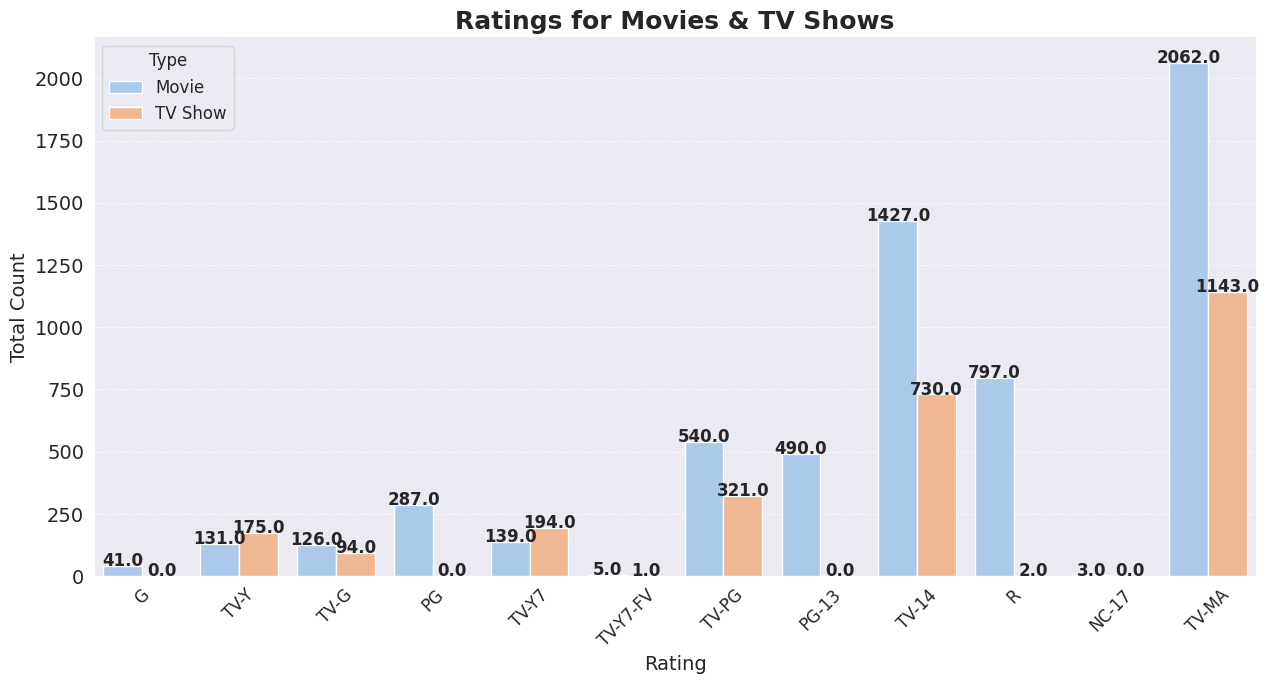

In [29]:
# Define the custom order for ratings
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

# Set a custom color palette
custom_palette = sns.color_palette("pastel")

# Create a figure and axis
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=netflix_titles_df, x="rating", hue="type", order=order, palette=custom_palette)

# Add a title and labels with custom fonts and sizes
ax.set_title("Ratings for Movies & TV Shows", fontsize=18, fontweight='bold')
ax.set_xlabel("Rating", fontsize=14)
ax.set_ylabel("Total Count", fontsize=14)

# Customize the tick labels
ax.set_xticklabels(order, fontsize=12, rotation=45)

# Customize the legend
ax.legend(title="Type", title_fontsize=12, fontsize=12)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations with the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, fontweight='bold')

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()


ValueError: ignored

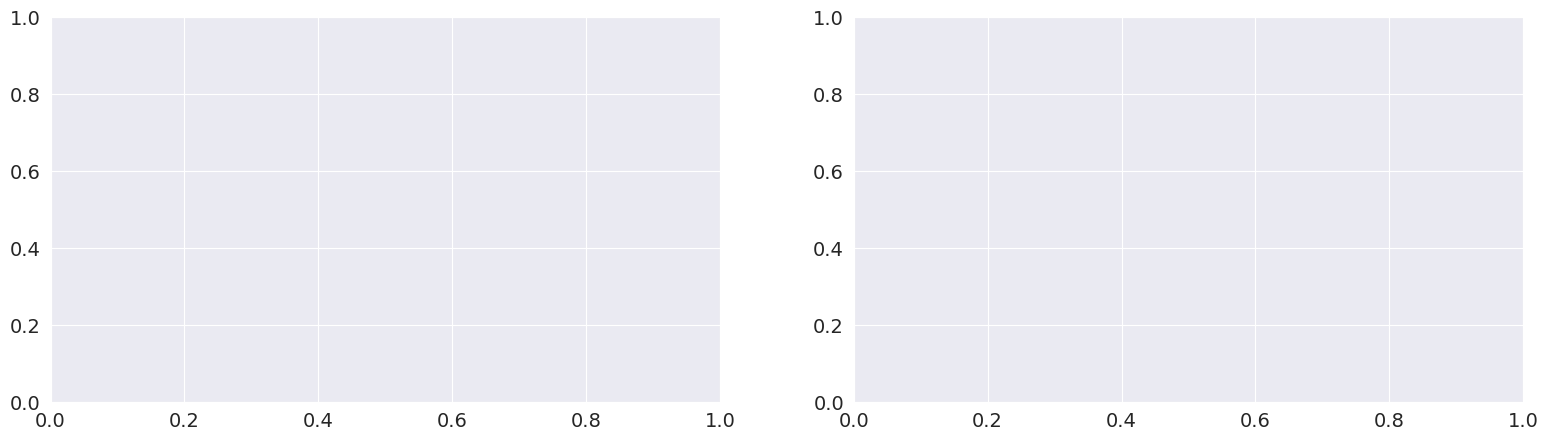

In [30]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(netflix_movies_df.rating, order=order,palette="Set2", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(netflix_shows_df.rating, order=order,palette="Set2", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

In [ ]:
# fig, ax = plt.subplots(1,2, figsize=(19, 5))
# g1 = sns.countplot(netflix_movies_df.rating, order=order,palette="Set2", ax=ax[0]);
# g1.set_title("Ratings for Movies")
# g1.set_xlabel("Rating")
# g1.set_ylabel("Total Count")
# g2 = sns.countplot(netflix_shows_df.rating, order=order,palette="Set2", ax=ax[1]);
# g2.set(yticks=np.arange(0,1600,200))
# g2.set_title("Ratings for TV Shows")
# g2.set_xlabel("Rating")
# g2.set_ylabel("Total Count")
# fig.show()

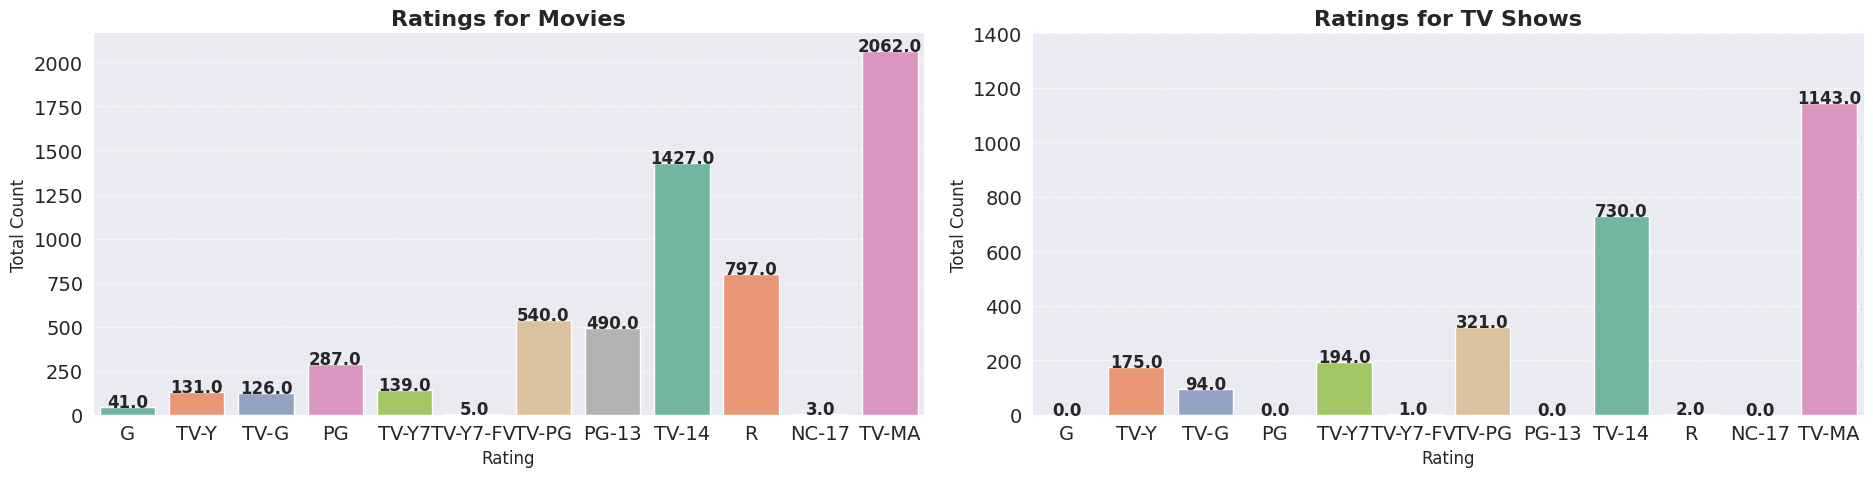

In [31]:

# Define the custom order for ratings
order = ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(19, 5))

# Create the countplot for Movies
g1 = sns.countplot(data=netflix_movies_df, x="rating", order=order, palette="Set2", ax=ax[0])
g1.set_title("Ratings for Movies", fontsize=16, fontweight='bold')
g1.set_xlabel("Rating", fontsize=12)
g1.set_ylabel("Total Count", fontsize=12)

# Create the countplot for TV Shows
g2 = sns.countplot(data=netflix_shows_df, x="rating", order=order, palette="Set2", ax=ax[1])
g2.set_title("Ratings for TV Shows", fontsize=16, fontweight='bold')
g2.set_xlabel("Rating", fontsize=12)
g2.set_ylabel("Total Count", fontsize=12)

# Customize the y-axis ticks for the TV Shows plot
g2.set_yticks(np.arange(0, 1600, 200))

# Add grid lines to both plots
for subplot in ax:
    subplot.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations with the count above each bar in both plots
for p in g1.patches:
    g1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, fontweight='bold')

for p in g2.patches:
    g2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, fontweight='bold')

# Remove the top and right spines in both plots
for subplot in ax:
    sns.despine(ax=subplot)

# Adjust the space between the subplots
plt.tight_layout()

# Show the plot
plt.show()


Overall, there is much more content for a more mature audience. For the mature audience, there is much more movie content than there are TV shows. However, for the younger audience (under the age of 17), it is the opposite, there are slightly more TV shows than there are movies.

In [32]:
netflix_titles_df['year_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).year
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_shows_df['year_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).year
netflix_titles_df['month_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).month
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_shows_df['month_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).month

### Content added each year
Now we will take a look at the amount content Netflix has added throughout the previous years. Since we are interested in when Netflix added the title onto their platform, we will add a 'year_added' column shows the year of the date from the 'date_added' column as shown above.

In [33]:
netflix_year = netflix_titles_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2023]
netflix_year

,year,count
0,2019,2016
1,2020,1879
2,2018,1648
3,2021,1498
4,2017,1186
5,2016,428
6,2015,82
7,2014,24
8,2011,13
9,2013,11


In [34]:
netflix_year2 = netflix_titles_df[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

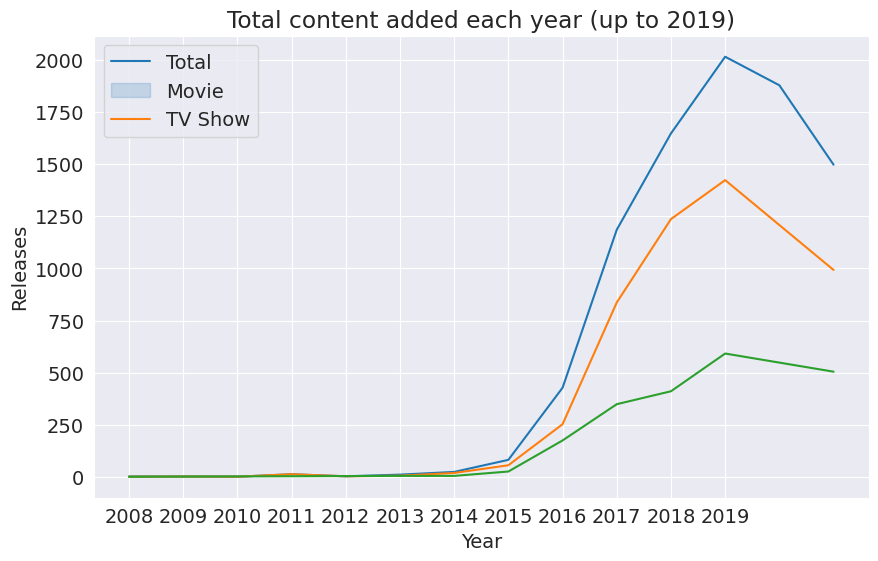

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Based on the above timeline, we can see that the popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been tremendous. I decided to exclude content added during 2020 since the data does not include a full years worth of data. We can see that there has been a consistent growth in the number of movies on Netflix compared to shows.

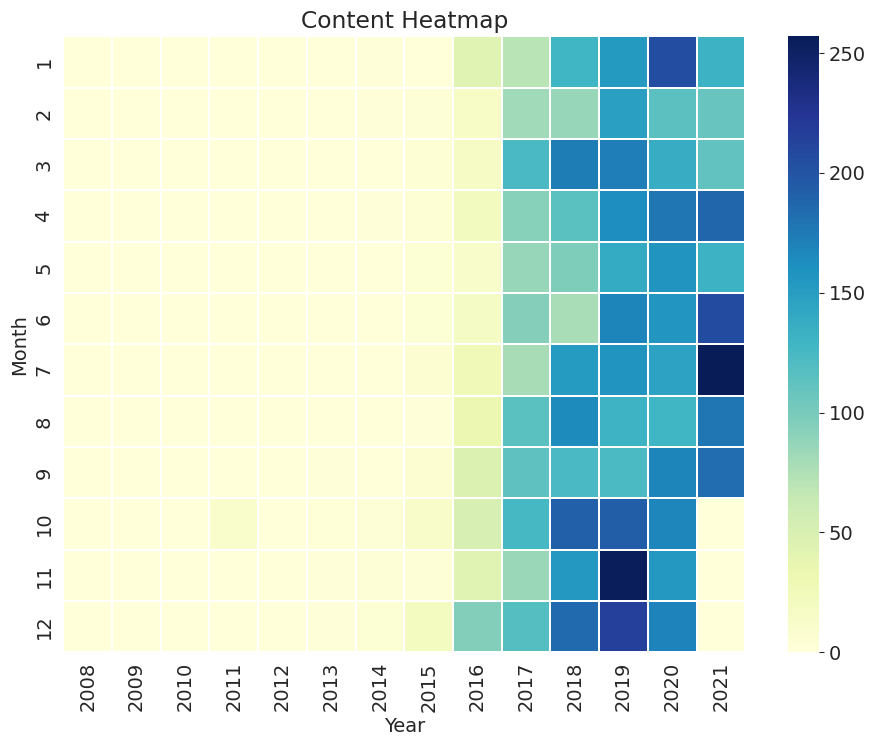

In [36]:
month_year_df = netflix_titles_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the above heatmap, we can see that around 2014 is when Netflix began to increase their content count. We can see over the years and months, Netflix continues to slowly increase the amount of content that is being added into their platform. We can see in 2020, the data stops at January since that is the latest month available in the dataset.

### Countries with the most content available

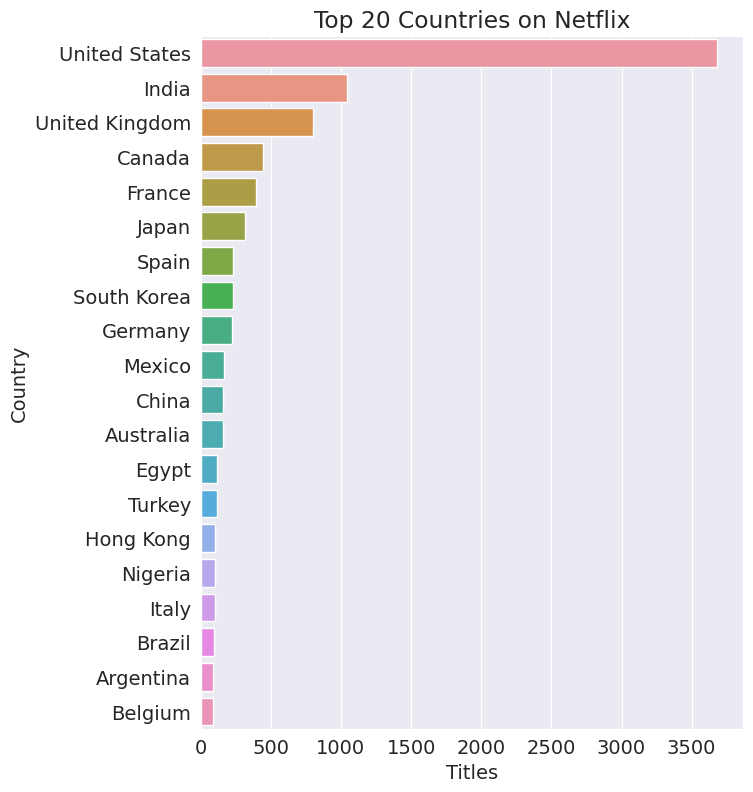

In [37]:
filtered_countries = netflix_titles_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

Now we will explore the countries with the most content on Netflix. Films typically are available in multiple countries as shown in the original dataset. Therefore, we need to seperate all countries within a film before we can analyze the data. After seperating countries and removing titles with no countries available, we can plot a Top 20 list to see which countries have the highest availability of films on Netflix. Unsurprisingly, the United States stands out on top since Netflix is an American company. India surprisingly comes in second followed by the UK and Canada. China interestingly is not even close to the top even though it has about 18% of the world's population. Reasons for this could be for political reasons and the banning of certain applications which isn't uncommon between the United States and China.

### Popular Genres

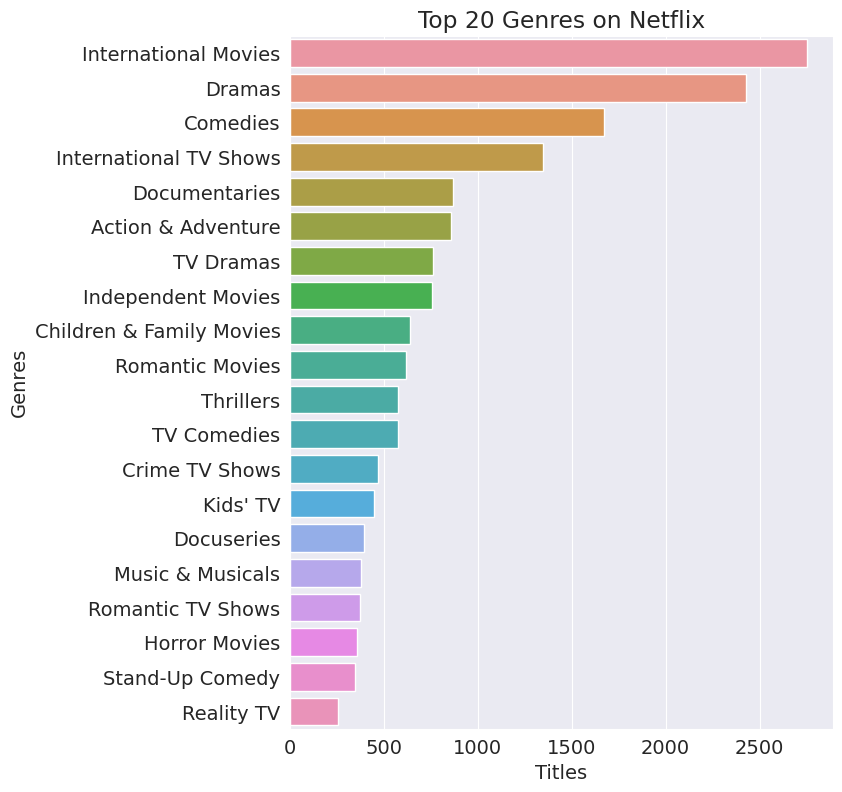

In [38]:
filtered_genres = netflix_titles_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies. The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are actually international subscribers.

## Asking and Answering Questions

`Quantitative and qualitative analysis (Asking and Answering Questions).`

Asking questions that could lead to reaching the project's aim, presents global-useful information about the different columns of the dataset. Some initial examinations were performed as a way of beginning finding patterns, creating hypotheses, and corroborating early assumptions. Later, deeper investigations were depicted as part of reaching the project's goal.

### What are the popular genres?

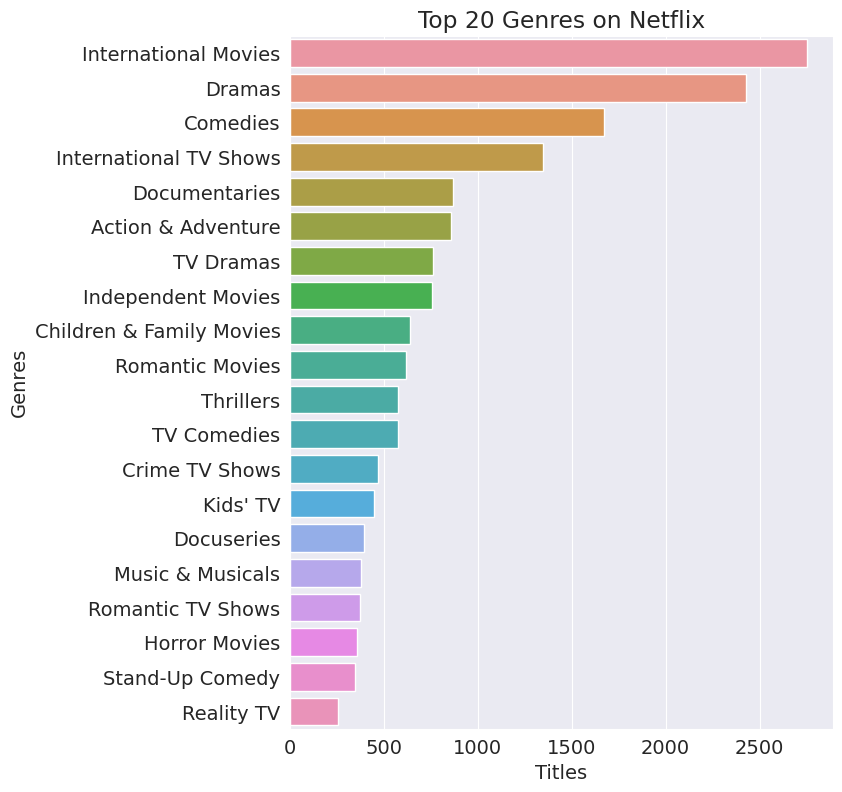

In [39]:
filtered_genres = netflix_titles_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

### What are the countries with the most content available on Netflix?

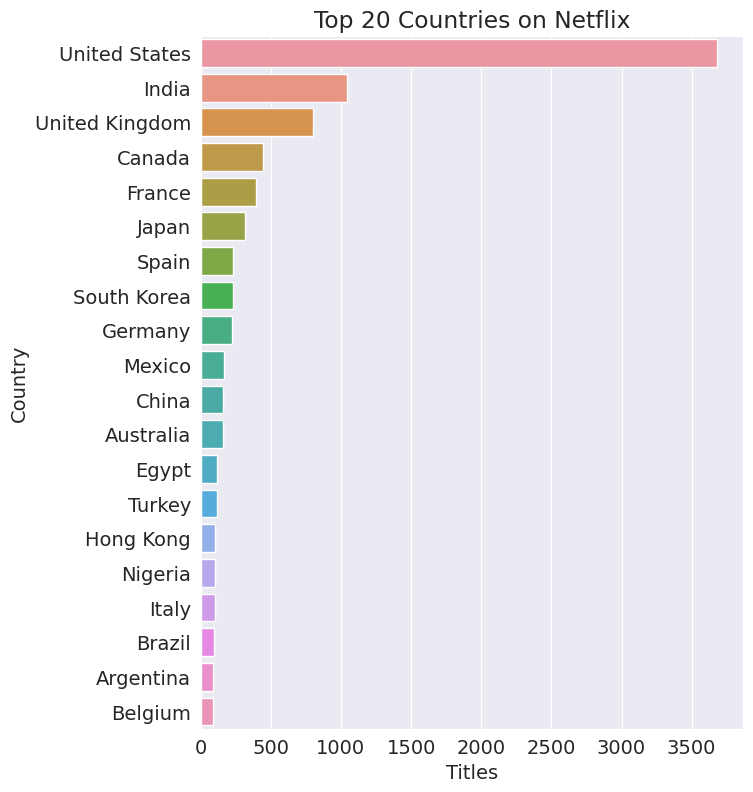

In [40]:
filtered_countries = netflix_titles_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

### Who are the top 10 directors on Netflix with the most releases?

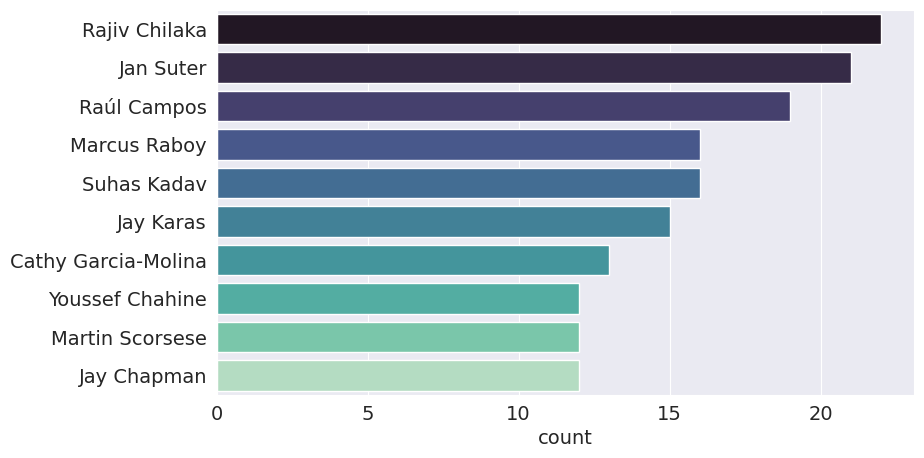

In [41]:
filtered_directors = netflix_titles_df[netflix_titles_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='mako')
plt.show()

As stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

### Who are the top 10 actors on Netflix based on number of titles?

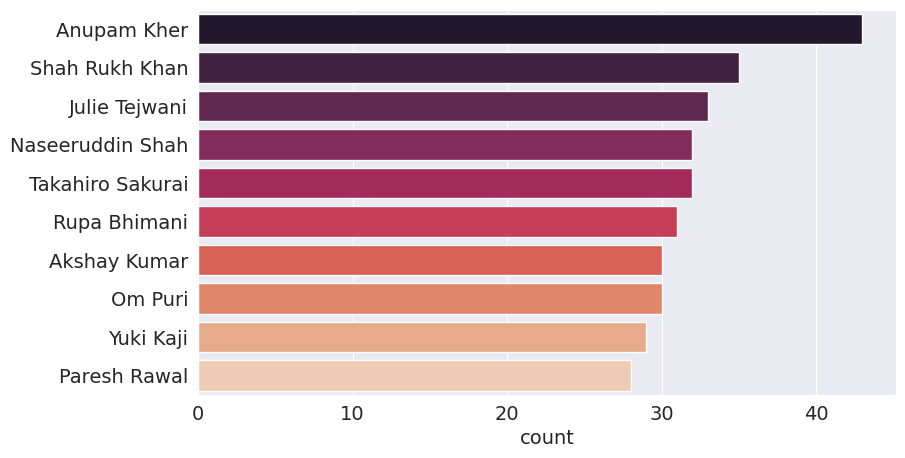

In [42]:
filtered_cast = netflix_titles_df[netflix_titles_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast, order=filtered_cast.value_counts().index[:10], palette='rocket')
plt.show()

In this list, we can see that the most popular actors on Netflix based on the number of titles are all international as well. This reinforces the sentiment that the majority of Netflix subscribers are international.

### How does the timeline look like for the addition of International Movies compared to International TV Shows?

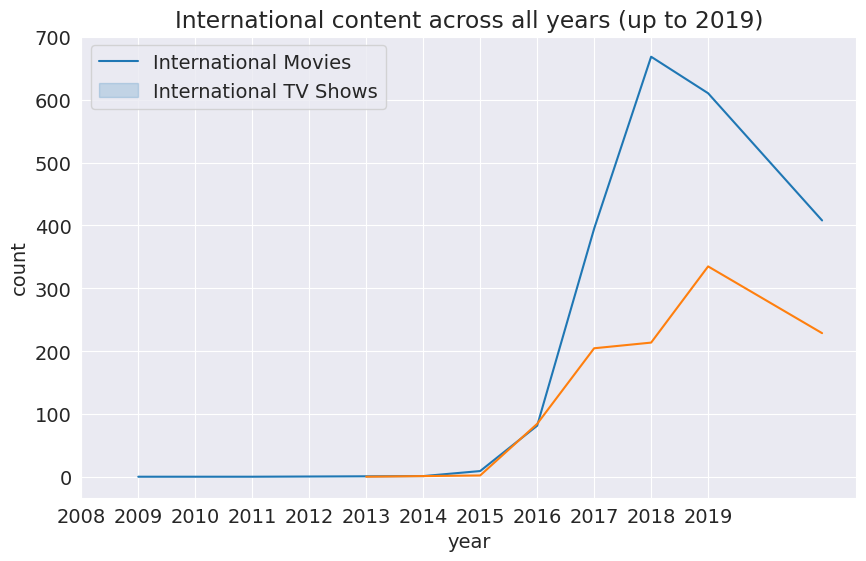

In [43]:
international_movies = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2020]

international_shows = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2020]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2020, 1))
plt.title("International content across all years (up to 2019)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

Based on the timeline, we can see that there are far more international movie releases than there are international tv show releases. However, near 2018, the growth of international movies started to decline while international tv shows constantly showed significant growth in the past few years.

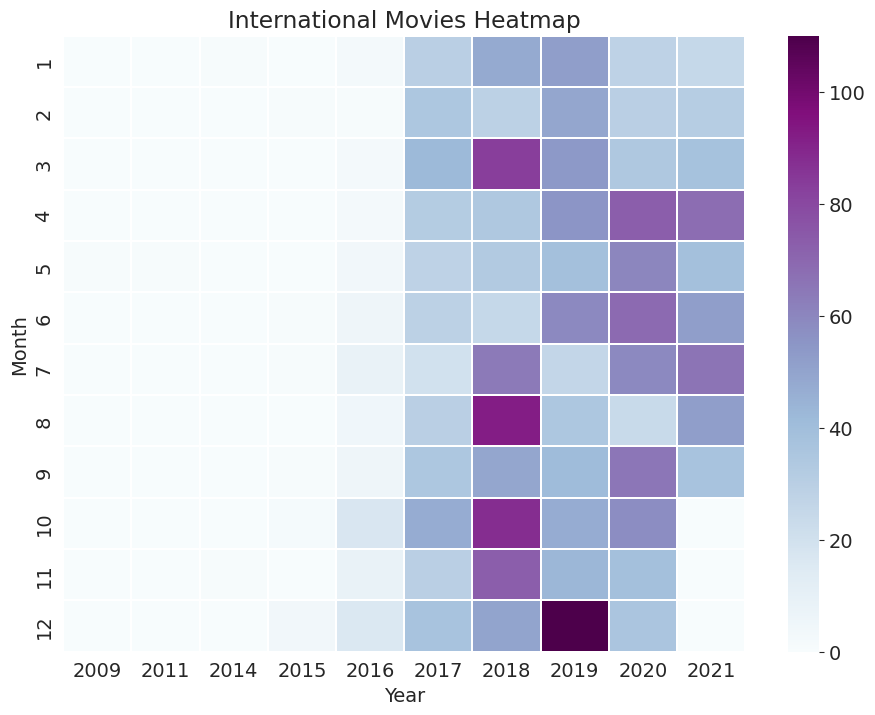

In [44]:
intmov_month_year_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intmov_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title("International Movies Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the heatmap above, we can see that a majority of international movies were added throughout the year in 2018. Then in December 2019, Netflix added the most international movie content.

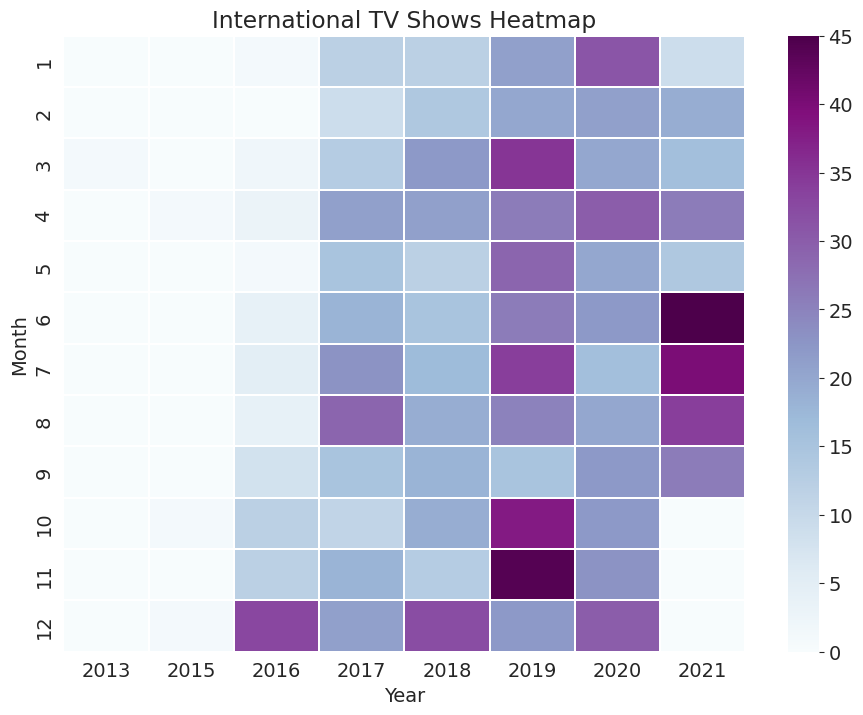

In [45]:
intsho_month_year_df = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intsho_month_year_df, linewidths=0.025, cmap="BuPu")
plt.title("International TV Shows Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the above heatmap, we can see that the majority of international TV shows were added throughout the year 2019.

# Inferences and Conclusion
It's clear that Netflix has grown over the years. We can see it from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. Based on an article from Business Insider, Netflix had about 158 million subscribers worldwide with 60 million from the US and almost 98 million internationally. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.

https://www.businessinsider.com/netflix-growth-comes-from-international-markets-2019-10

# References





Check out the following resources to learn more about the dataset and tools used in this notebook:
* https://www.kaggle.com/shivamb/netflix-shows
* https://www.businessinsider.com/netflix-growth-comes-from-international-markets-2019-10
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets